<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/MMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
#plt.style.use('seaborn-whitegrid')
'''
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 2
plt.rcParams['grid.color'] = "#cccccc"
'''

'\nplt.rcParams[\'axes.facecolor\'] = \'white\'\nplt.rcParams[\'axes.edgecolor\'] = \'white\'\nplt.rcParams[\'axes.grid\'] = True\nplt.rcParams[\'grid.alpha\'] = 2\nplt.rcParams[\'grid.color\'] = "#cccccc"\n'

In [50]:
nifty = pd.read_csv('/content/MMI_2021-08-27.csv')
#nifty = pd.read_csv('/content/a.csv')
colnames= ['Date','MMI','Nifty']
nifty.columns=colnames


In [51]:
nifty.head()

,Date,MMI,Nifty
0,26/08/2021,36.378176,16636.90
1,25/08/2021,41.611745,16634.65
2,24/08/2021,44.328347,16624.60
3,23/08/2021,41.802069,16496.45
4,20/08/2021,49.287176,16450.50


In [52]:
data = pd.DataFrame({'Date':['27/08/2021'] ,'MMI': [40.02],'Nifty':[16705]})

In [53]:
nifty= pd.concat([data,nifty],axis=0)
nifty.head()

,Date,MMI,Nifty
0,27/08/2021,40.020000,16705.00
0,26/08/2021,36.378176,16636.90
1,25/08/2021,41.611745,16634.65
2,24/08/2021,44.328347,16624.60
3,23/08/2021,41.802069,16496.45


In [54]:
#len(nifty)

In [55]:
#nifty = nifty.iloc[1200:]

In [56]:
nifty['Date']=pd.to_datetime(nifty['Date'],format='%d/%m/%Y')

In [57]:
nifty.head(5)

,Date,MMI,Nifty
0,2021-08-27,40.020000,16705.00
0,2021-08-26,36.378176,16636.90
1,2021-08-25,41.611745,16634.65
2,2021-08-24,44.328347,16624.60
3,2021-08-23,41.802069,16496.45


In [58]:
#if TypeError:
#    nifty['Date']=pd.to_datetime(nifty['Date'],format='%d-%m-%Y')
#else:
#    nifty['Date']=pd.to_datetime(nifty['Date'],format='%d/%m/%Y')  

In [59]:
nifty= nifty.set_index('Date')

In [60]:
#nifty.drop(nifty.index[1500:], inplace=True)

In [61]:
nifty.head()

,MMI,Nifty
Date,,
2021-08-27,40.020000,16705.00
2021-08-26,36.378176,16636.90
2021-08-25,41.611745,16634.65
2021-08-24,44.328347,16624.60
2021-08-23,41.802069,16496.45


In [62]:
nifty.tail()

,MMI,Nifty
Date,,
2012-03-16,43.219621,5317.90
2012-03-15,52.371887,5380.50
2012-03-14,64.825216,5463.90
2012-03-13,64.145980,5429.50
2012-03-12,60.443328,5359.55


In [63]:
nifty = nifty.loc[~nifty.index.duplicated(keep='first')]

In [64]:
nifty['macd']=nifty['MMI'][::-1].ewm(span=50, adjust=False).mean()-nifty['MMI'][::-1].ewm(span=200, adjust=False).mean()
nifty['signal']=nifty['macd'].ewm(span=35,adjust=False).mean()
nifty['signal10']=nifty['macd'].ewm(span=10,adjust=False).mean()

In [65]:
nifty['50 Day'] = nifty['MMI'][::-1].rolling(window=45).mean()
nifty['10 Day'] = nifty['MMI'][::-1].rolling(window=30).mean()
nifty['50ema'] = nifty['Nifty'][::-1].ewm(span=50,adjust=False).mean()

In [66]:
nifty.head(5)

,MMI,Nifty,macd,signal,signal10,50 Day,10 Day,50ema
Date,,,,,,,,
2021-08-27,40.020000,16705.00,-2.226589,-2.226589,-2.226589,48.748162,44.698372,16056.349688
2021-08-26,36.378176,16636.90,-1.960994,-2.211834,-2.178299,49.175283,45.005322,16029.874165
2021-08-25,41.611745,16634.65,-1.568932,-2.176117,-2.067505,49.843453,45.477257,16005.097600
2021-08-24,44.328347,16624.60,-1.317139,-2.128396,-1.931075,50.425674,45.644924,15979.401584
2021-08-23,41.802069,16496.45,-1.135473,-2.073233,-1.786420,50.823219,45.654924,15953.066955


# MMI Plot Vs Nifty

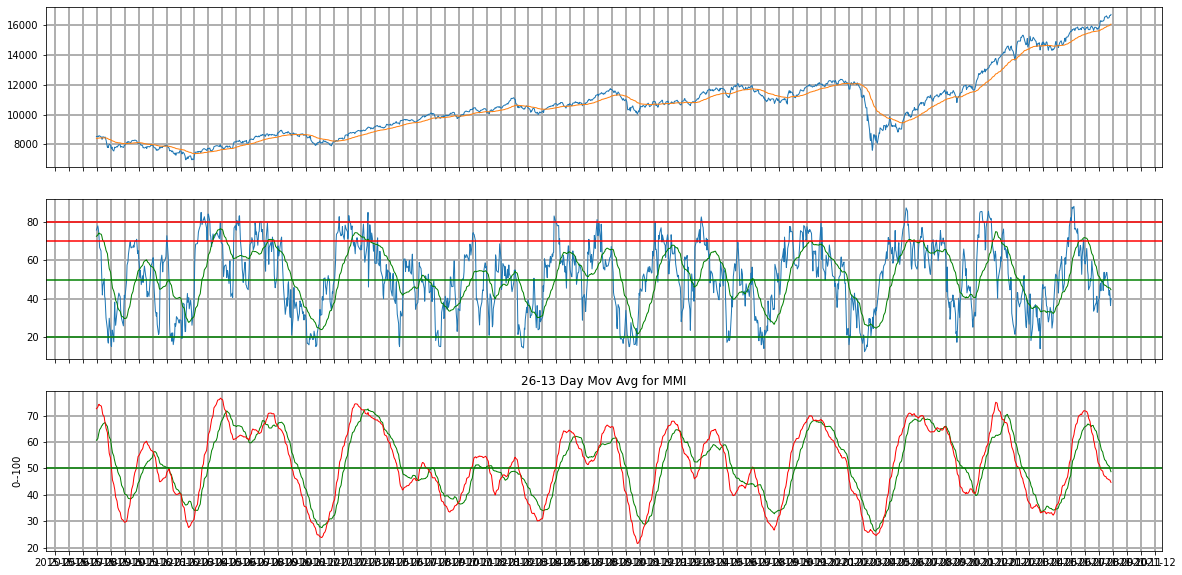

In [67]:
from matplotlib.dates import MonthLocator, YearLocator
t=1500
fig, ax = plt.subplots(3,1,figsize=(20,10),sharex=True)

ax[0].plot(nifty.index.values[:t],nifty['Nifty'].values[:t],linewidth=1 )
ax[0].plot(nifty.index.values[:t],nifty['50ema'].values[:t],linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['MMI'].values[:t],linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['10 Day'].values[:t],color='g',linewidth=1 )
ax[2].plot(nifty.index.values[:t],nifty['50 Day'].values[:t],color='g',linewidth=1 )
ax[2].plot(nifty.index.values[:t],nifty['10 Day'].values[:t],color= 'r',linewidth=1 )
ax[1].axhline(y=70 , color ='r')
ax[1].axhline(y=80 , color ='r')
ax[1].axhline(y=20 , color= 'g')
ax[1].axhline(y=50 , color= 'g')
ax[2].axhline(y=50 , color= 'g')
plt.title('26-13 Day Mov Avg for MMI')
plt.ylabel('0--100')
#fig.savefig('test2png.png', dpi=150)
yloc = YearLocator()
mloc = MonthLocator()
ax[0].xaxis.set_major_locator(mloc)
ax[1].xaxis.set_major_locator(mloc)
ax[2].xaxis.set_major_locator(mloc)
ax[0].grid(linewidth =2)
ax[1].grid(linewidth =2)
ax[2].grid(linewidth =2)
plt.show()

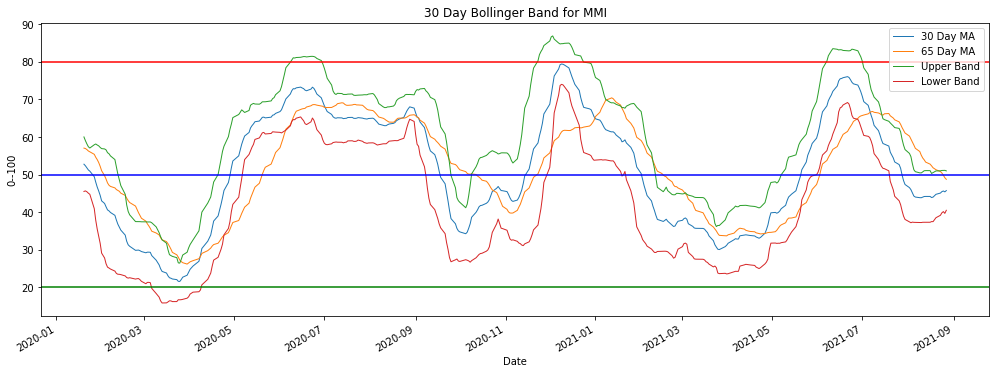

In [68]:
# Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band
nifty['30 Day MA'] = nifty['MMI'][::-1].rolling(window=21).mean()

nifty['65 Day MA'] = nifty['MMI'][::-1].rolling(window=45).mean()

# set .std(ddof=0) for population std instead of sample
nifty['30 Day STD'] = nifty['MMI'][::-1].rolling(window=21).std() 

nifty['Upper Band'] = nifty['30 Day MA'] + (nifty['30 Day STD'] *.9)
nifty['Lower Band'] = nifty['30 Day MA'] - (nifty['30 Day STD'] *.9)

# Simple 30 Day Bollinger Band for Facebook (2016-2017)
nifty[['30 Day MA', '65 Day MA', 'Upper Band', 'Lower Band']][:400].plot(figsize=(17,6),linewidth=1)
plt.axhline(80 , color='r')
plt.axhline(50 , color='b')
plt.axhline(20,color='g')
plt.title('30 Day Bollinger Band for MMI')
plt.ylabel('0--100')


plt.savefig('bollingerband.png', dpi=150)

plt.show();

In [69]:
weekly_summary = pd.DataFrame()
#weekly_summary['Nifty'] = nifty[' Nifty Index'].resample('W').sum()
#weekly_summary['MMI'] = nifty[' Market Mood Index'].resample('W').sum()

In [70]:
weekly_summary = nifty.resample('W').last()

In [71]:
weekly_summary.tail()

,MMI,Nifty,macd,signal,signal10,50 Day,10 Day,50ema,30 Day MA,65 Day MA,30 Day STD,Upper Band,Lower Band
Date,,,,,,,,,,,,,
2021-08-01,38.734858,15763.05,0.153895,-1.257782,-0.533873,61.072908,52.045331,15605.934052,47.372527,61.072908,10.328235,56.667938,38.077115
2021-08-08,49.163690,16238.20,-0.778004,-1.574488,-1.036962,56.994134,49.377448,15707.894044,44.032650,56.994134,7.494688,50.777869,37.287431
2021-08-15,49.615676,16529.10,-1.012285,-1.785703,-1.243881,53.326095,47.058971,15823.918504,44.194474,53.326095,7.633563,51.064681,37.324268
2021-08-22,49.287176,16450.50,-0.866303,-2.006182,-1.619126,51.300390,46.006750,15930.888055,44.759298,51.300390,6.911858,50.979970,38.538626
2021-08-29,40.020000,16705.00,-2.226589,-2.226589,-2.226589,48.748162,44.698372,16056.349688,45.749789,48.748162,5.823791,50.991201,40.508377


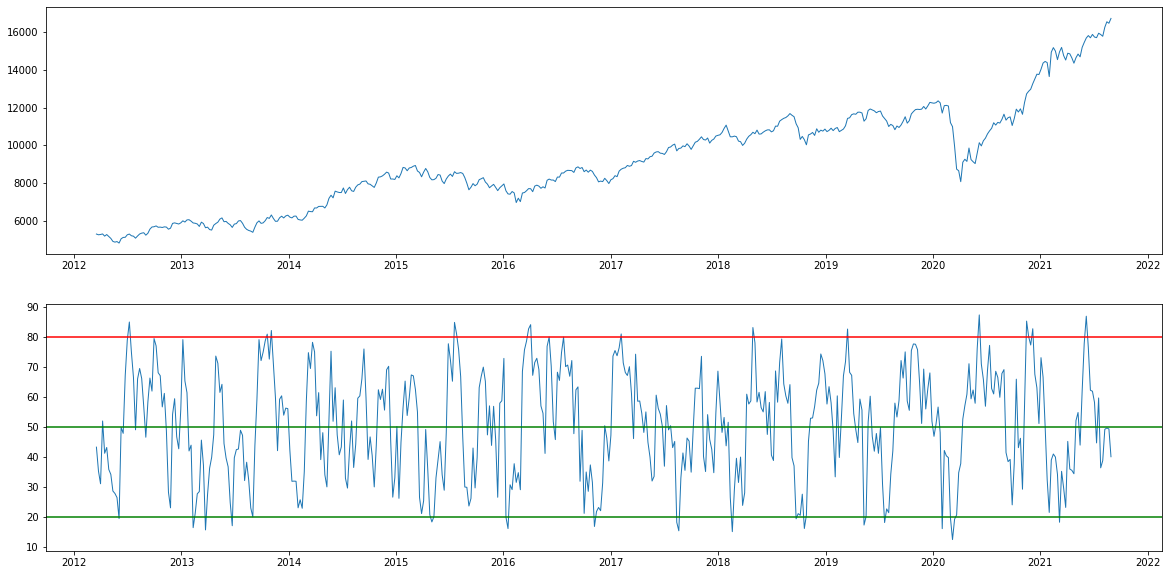

In [72]:
fig, ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(weekly_summary.index.values,weekly_summary['Nifty'].values,linewidth=1)
ax[1].plot(weekly_summary.index.values,weekly_summary['MMI'].values,linewidth=1)
ax[1].axhline(y=80 , color ='r')
ax[1].axhline(y=20 , color= 'g')
ax[1].axhline(y=50 , color= 'g')
fig.savefig('testWpng.png', dpi=150)
plt.show()

In [73]:
weekly_summary['13W'] = weekly_summary['MMI'].rolling(window=13).mean()
weekly_summary['26W'] = weekly_summary['MMI'].rolling(window=5).mean()

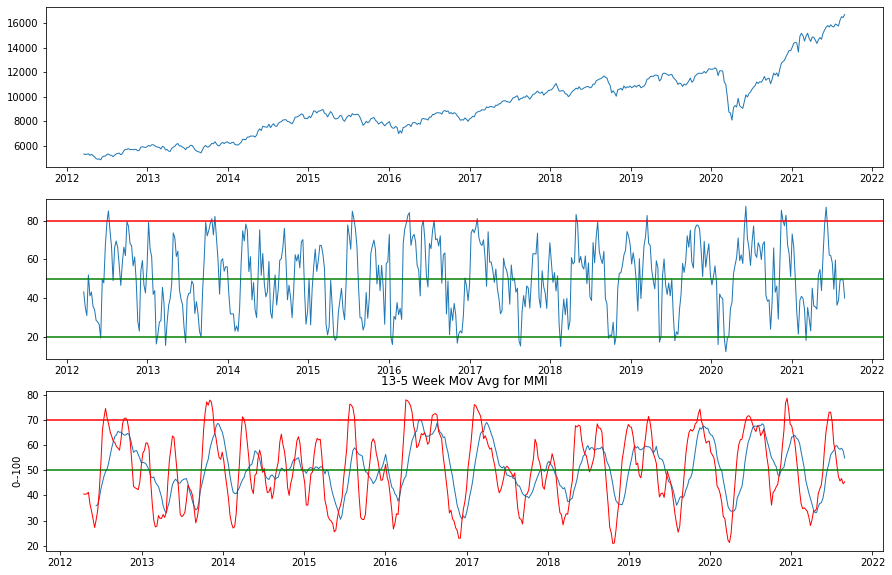

In [74]:
t=200
s=200
fig, ax = plt.subplots(3,1,figsize=(15,10))
ax[0].plot(weekly_summary.index.values,weekly_summary['Nifty'].values,linewidth=1 )
ax[1].plot(weekly_summary.index.values,weekly_summary['MMI'].values,linewidth=1)
ax[2].plot(weekly_summary.index.values,weekly_summary['13W'].values,linewidth=1)
ax[2].plot(weekly_summary.index.values,weekly_summary['26W'].values,'r',linewidth=1)
ax[1].axhline(y=80 , color ='r')
ax[1].axhline(y=20 , color= 'g')
ax[1].axhline(y=50 , color= 'g')
ax[2].axhline(y=50 , color= 'g')
ax[2].axhline(y=70 , color= 'r')
plt.title('13-5 Week Mov Avg for MMI')
plt.ylabel('0--100')
fig.savefig('weekly', dpi=150)
plt.show()

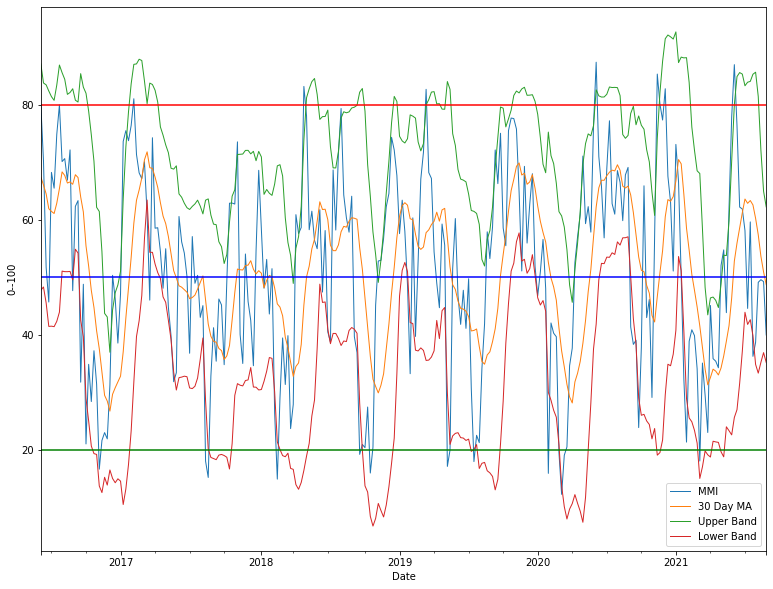

In [75]:
# Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band

weekly_summary['30 Day MA'] = weekly_summary['MMI'].rolling(window=10).mean()

# set .std(ddof=0) for population std instead of sample
weekly_summary['30 Day STD'] = weekly_summary['MMI'].rolling(window=10).std() 

weekly_summary['Upper Band'] = weekly_summary['30 Day MA'] + (weekly_summary['30 Day STD'] *1.5)
weekly_summary['Lower Band'] = weekly_summary['30 Day MA'] - (weekly_summary['30 Day STD'] *1.5)

# Simple 30 Day Bollinger Band for Facebook (2016-2017)
weekly_summary[['MMI', '30 Day MA', 'Upper Band', 'Lower Band']][220:].plot(figsize=(13,10),linewidth=1)
plt.axhline(80 , color='r')
plt.axhline(50 , color='b')
plt.axhline(20,color='g')
#plt.title('30 Day Bollinger Band for MMI')
plt.ylabel('0--100')


#plt.savefig('bollingerband.png', dpi=150)

plt.show();